<a href="https://colab.research.google.com/github/RichardOrimolade/FirstRepo/blob/master/TimeSeriesprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series with Facebook Prophet

In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 106 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638722 sha256=b7295f0a8b2496e08b4fa17ee8d01967ecbf1572944aede4c21d41e42c5908e6
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [3]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
from fbprophet import Prophet
df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )
df[ 'Month' ]= pd.to_datetime(df[ 'Month' ])
df = df.rename(columns={ "Month" : "ds" , "Passengers" : "y" })
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


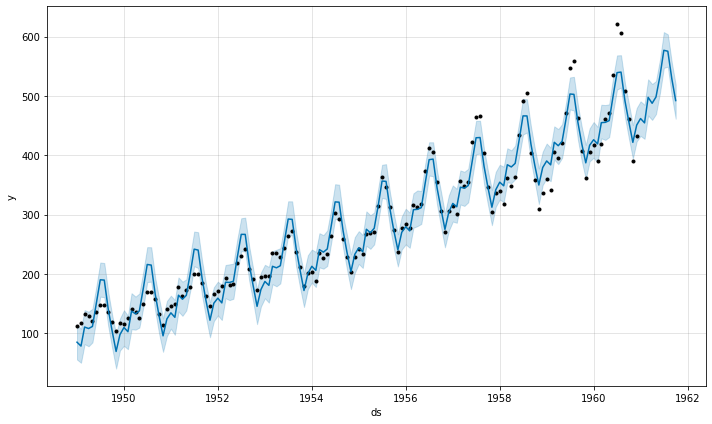

In [7]:
#predict for the next 10 months
future = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

model.plot(forecast)
plt.show()

In [11]:
from fbprophet import Prophet
df=pd.read_csv('/Time_series_analysis_and_forecast_DATASET (1).csv')
df[ 'FullDate' ]= pd.to_datetime(df[ 'FullDate' ])
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-01-09 00:00:00,15.8,1688.215,3.69,23.710
1,2010-01-09 01:00:00,15.8,1669.195,3.69,22.635
2,2010-01-09 02:00:00,15.8,1491.980,3.69,22.565
3,2010-01-09 03:00:00,15.8,1330.760,3.69,18.910
4,2010-01-09 04:00:00,15.8,1247.940,3.69,18.030


In [12]:
df.shape

(92016, 5)

In [13]:
df.isnull().sum()

ds          0
Tmax        0
SysLoad     0
GasPrice    0
y           0
dtype: int64

In [14]:
df.describe()

,Tmax,SysLoad,GasPrice,y
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        92016 non-null  datetime64[ns]
 1   Tmax      92016 non-null  float64       
 2   SysLoad   92016 non-null  float64       
 3   GasPrice  92016 non-null  float64       
 4   y         92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [16]:
df.set_index('ds', inplace=True)

In [17]:
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-01-09 00:00:00,15.8,1688.215,3.69,23.710
2010-01-09 01:00:00,15.8,1669.195,3.69,22.635
2010-01-09 02:00:00,15.8,1491.980,3.69,22.565
2010-01-09 03:00:00,15.8,1330.760,3.69,18.910
2010-01-09 04:00:00,15.8,1247.940,3.69,18.030


In [18]:
df = df.asfreq('h')

In [20]:
df.isnull().sum()

Tmax        12288
SysLoad     12288
GasPrice    12288
y           12288
dtype: int64

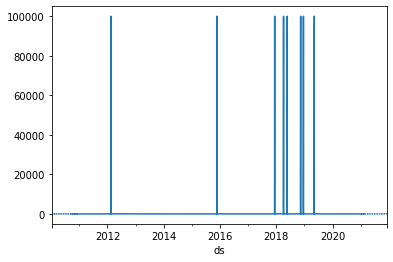

In [21]:
df.Tmax.plot()

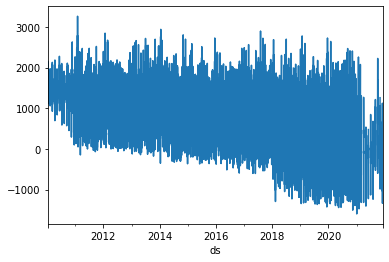

In [23]:
df.SysLoad.plot()

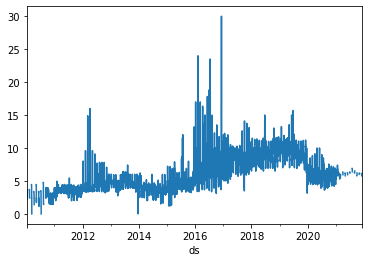

In [25]:
df.GasPrice.plot()

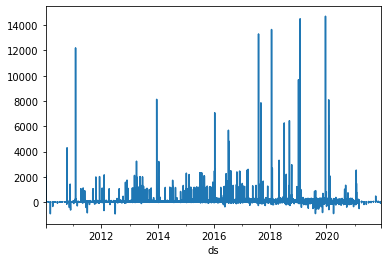

In [27]:
df.y.plot()

Let generate a white noise (wn) that we have same (le drop the other feature to arrive at that)

In [28]:
del df['Tmax'], df['SysLoad'], df['GasPrice']

In [29]:
df.head()

,y
ds,
2010-01-09 00:00:00,23.710
2010-01-09 01:00:00,22.635
2010-01-09 02:00:00,22.565
2010-01-09 03:00:00,18.910
2010-01-09 04:00:00,18.030


In [30]:
wn = np.random.normal(loc= df['y'].mean(), scale = df['y'].std(), size= len(df))

In [31]:
df['wn'] = wn

In [32]:
df.head()

,y,wn
ds,,
2010-01-09 00:00:00,23.710,281.343876
2010-01-09 01:00:00,22.635,138.559493
2010-01-09 02:00:00,22.565,207.176877
2010-01-09 03:00:00,18.910,-147.054084
2010-01-09 04:00:00,18.030,-25.523253


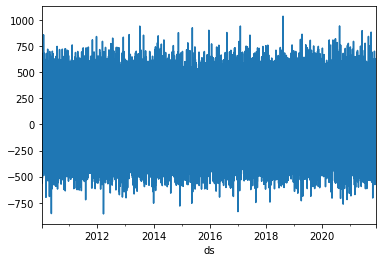

In [33]:
df.wn.plot()
# this has a mean of zero, constant mean, constant variance, no autocorrelation and no lags

To Determine if Dataset is stationary or non stationary we use Dickfuller test we use Ho H1 hypothesis H1 assumed non stationary and H0 is stationary that is the assumption

In [40]:
# Let us test our wn if its stationary or non
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
df = df.dropna()
sts.adfuller(df.y)
# -35.9210 is test stat, 0.0 is p-value(if greater than 0.05 its not stationary (H1)), 47 is number of lags

(-35.92103274539618,
 0.0,
 47,
 91968,
 {'1%': -3.430421106064385,
  '5%': -2.8615714277361963,
  '10%': -2.5667867278895184},
 1196639.2869781787)

In [44]:
sts.adfuller(df.wn)
# -152.9787 is test stat, 0.0 is p-value(if lesser than 0.05 its stationary), 3 is number of lags

(-152.9787832063379,
 0.0,
 3,
 92012,
 {'1%': -3.4304210720606236,
  '5%': -2.861571412707261,
  '10%': -2.566786719890108},
 1247174.2747599036)

Seasonality: is there a repeated parttern on dataset and we use the decompose tech and it displayed the trend season and residual (error value), naive decompose, multiplicative model of the trend seasonality n the residual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


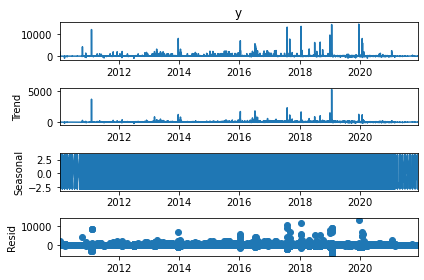

In [51]:
df.sort_index(inplace= True)
sea_dec_add = seasonal_decompose(df.y, model = 'additive', freq=15).plot()

ACF tells us (if observation has relationship with itself then it has auto correlation and vice versa) we now plot the ACF fn it helps to find if it has auto corr or not

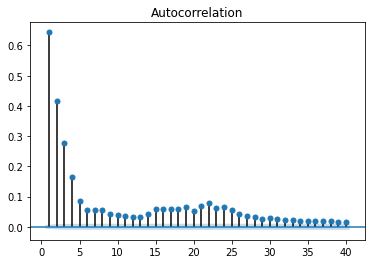

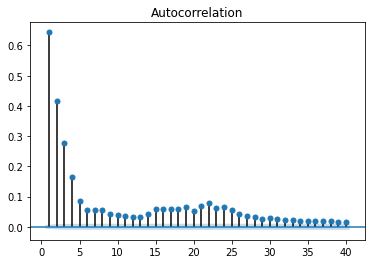

In [52]:
sgt.plot_acf(df.y, lags = 40, zero=False)

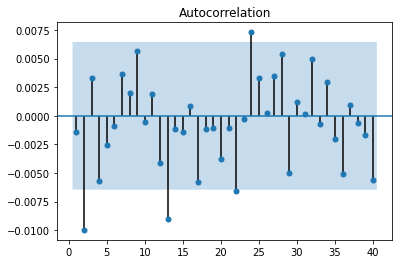

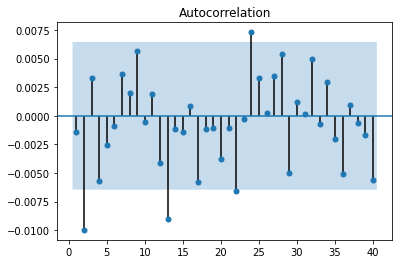

In [53]:
sgt.plot_acf(df.wn, lags = 40, zero=False)

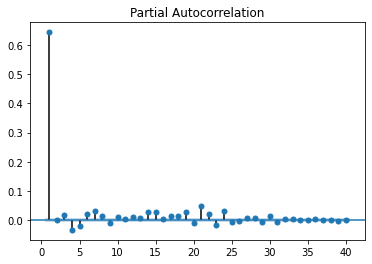

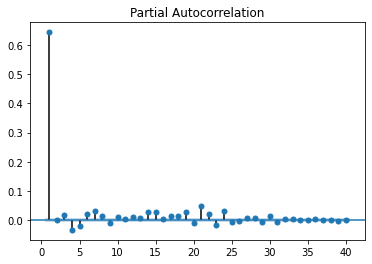

In [54]:
sgt.plot_pacf(df.y, lags = 40, zero=False)

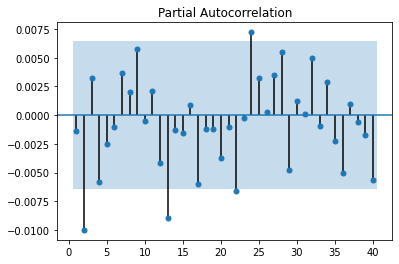

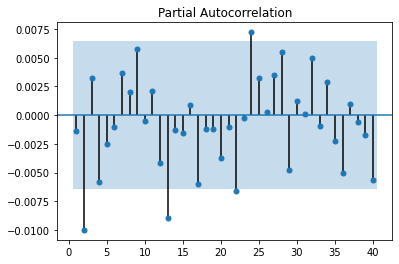

In [55]:
sgt.plot_pacf(df.wn, lags = 40, zero=False)

Modelling, AR, MA, ARMA, ARIMA,(I= the diff between observation and the others)

In [56]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [57]:
size = int(len(df)*80)
df_train = df.iloc[:2757]
df_test = df.iloc[2757:]

In [58]:
df_train.tail()

,y,wn
ds,,
2010-12-24 16:00:00,36.770,212.369486
2010-12-24 17:00:00,35.060,167.904656
2010-12-24 18:00:00,27.980,-8.898409
2010-12-24 19:00:00,28.115,98.898702
2010-12-24 20:00:00,27.690,104.038522


In [59]:
df_test.head()

,y,wn
ds,,
2010-12-24 21:00:00,24.870,-209.094772
2010-12-24 22:00:00,22.820,426.606539
2010-12-24 23:00:00,21.185,-155.072457
2010-12-25 00:00:00,20.120,242.155336
2010-12-25 01:00:00,18.065,-70.782000


In [61]:
import warnings
warnings.filterwarnings('ignore')
model_ar = ARMA(df_train.y, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood              -16613.632
Method:                       css-mle   S.D. of innovations            100.187
Date:                Mon, 10 Oct 2022   AIC                          33233.264
Time:                        23:12:24   BIC                          33251.030
Sample:                             0   HQIC                         33239.682
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1154      2.020     10.949      0.000      18.157      26.074
ar.L1.y        0.0554      0.019      2.912      0.004       0.018       0.093
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           18.0654           +0.0000j           18.0654            0.0000
-----------------------------------------------------------------------------
"""

In [62]:
model_ma = ARMA(df_train.y, order=(0,1))
results_ma = model_ma.fit()
results_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2757
Model:                     ARMA(0, 1)   Log Likelihood              -16613.947
Method:                       css-mle   S.D. of innovations            100.199
Date:                Mon, 10 Oct 2022   AIC                          33233.894
Time:                        23:14:06   BIC                          33251.660
Sample:                             0   HQIC                         33240.312
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1154      2.006     11.024      0.000      18.183      26.047
ma.L1.y        0.0513      0.018      2.800      0.005       0.015       0.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -19.4870           +0.0000j           19.4870            0.5000
-----------------------------------------------------------------------------
"""

Multivariate Time Series Forecasting with Facebook Prophet

In [63]:
from fbprophet import Prophet
df=pd.read_csv('/Time_series_analysis_and_forecast_DATASET (1).csv')
df[ 'FullDate' ]= pd.to_datetime(df[ 'FullDate' ])
df = df.rename(columns={ "FullDate" : "ds" , "SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3",  "ElecPrice" : "y" })
df.head()

,ds,add2,add1,add3,y
0,2010-01-09 00:00:00,15.8,1688.215,3.69,23.710
1,2010-01-09 01:00:00,15.8,1669.195,3.69,22.635
2,2010-01-09 02:00:00,15.8,1491.980,3.69,22.565
3,2010-01-09 03:00:00,15.8,1330.760,3.69,18.910
4,2010-01-09 04:00:00,15.8,1247.940,3.69,18.030


In [65]:
df.shape

(92016, 5)

In [66]:
df.isnull().sum()

ds      0
add2    0
add1    0
add3    0
y       0
dtype: int64

In [67]:
df.describe()

,add2,add1,add3,y
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      92016 non-null  datetime64[ns]
 1   add2    92016 non-null  float64       
 2   add1    92016 non-null  float64       
 3   add3    92016 non-null  float64       
 4   y       92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [69]:
df.set_index('ds', inplace=True)

In [70]:
df.head()

,add2,add1,add3,y
ds,,,,
2010-01-09 00:00:00,15.8,1688.215,3.69,23.710
2010-01-09 01:00:00,15.8,1669.195,3.69,22.635
2010-01-09 02:00:00,15.8,1491.980,3.69,22.565
2010-01-09 03:00:00,15.8,1330.760,3.69,18.910
2010-01-09 04:00:00,15.8,1247.940,3.69,18.030


In [71]:
df = df.asfreq('d')

In [72]:
df.isnull().sum()

add2    512
add1    512
add3    512
y       512
dtype: int64

In [73]:
df = df.dropna()

In [74]:
df.isnull().sum()

add2    0
add1    0
add3    0
y       0
dtype: int64

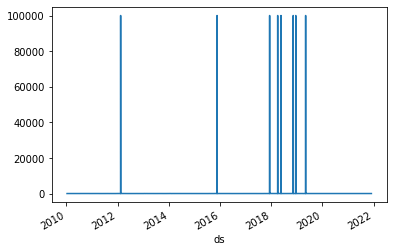

In [76]:
df.add2.plot()

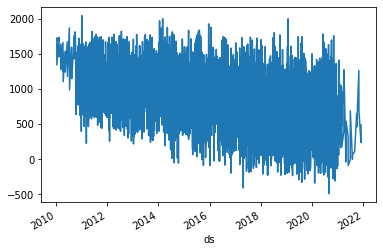

In [77]:
df.add1.plot()

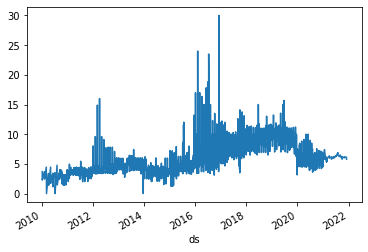

In [78]:
df.add3.plot()

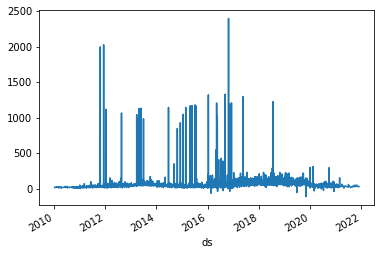

In [79]:
df.y.plot()

To Determine if Dataset is stationary or non stationary we use Dickfuller test we use Ho H1 hypothesis H1 assumed non stationary and H0 is stationary that is the assumption

In [80]:
sts.adfuller(df.add2)
# -62.022639 is test stat, 0.0 is p-value(if greater than 0.05 its not stationary (H1)), 0 is number of lags

(-62.022639792593594,
 0.0,
 0,
 3833,
 {'1%': -3.4320571966459488,
  '5%': -2.862294345771747,
  '10%': -2.567171547833638},
 74911.89001657067)

In [81]:
sts.adfuller(df.add1)
# -4.393237 is test stat, 0.000 is p-value(if greater than 0.05 its not stationary (H1)), 30 is number of lags

(-4.393237112198484,
 0.000305120651463471,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 56752.89442776555)

In [82]:
sts.adfuller(df.add3)
# -1.78785 is test stat, 0.3865 is p-value(if greater than 0.05 its not stationary (H1)), 30 is number of lags

(-1.7878571504741652,
 0.3865067276588882,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 12081.402981733047)

In [83]:
sts.adfuller(df.y)
# -6.47668 is test stat, 1.32577 is p-value(if greater than 0.05 its not stationary (H1)), 30 is number of lags

(-6.476687811007863,
 1.3257717545481459e-08,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 46840.47238766402)

Seasonality: is there a repeated parttern on dataset and we use the decompose tech and it displayed the trend season and residual (error value), naive decompose, multiplicative model of the trend seasonality n the residual

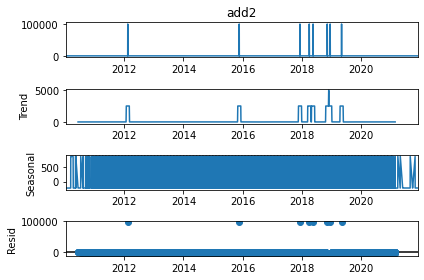

In [84]:
df.sort_index(inplace= True)
sea_dec_add = seasonal_decompose(df.add2, model = 'additive', freq=40).plot()

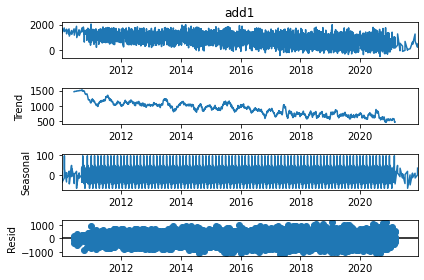

In [85]:
df.sort_index(inplace= True)
sea_dec_add = seasonal_decompose(df.add1, model = 'additive', freq=40).plot()

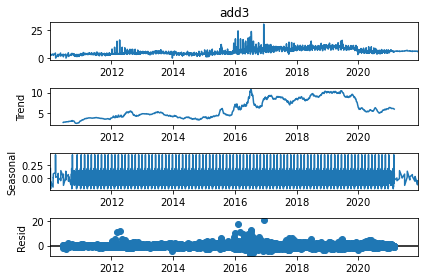

In [86]:
df.sort_index(inplace= True)
sea_dec_add = seasonal_decompose(df.add3, model = 'additive', freq=40).plot()

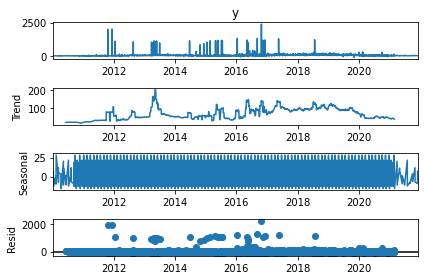

In [87]:
df.sort_index(inplace= True)
sea_dec_add = seasonal_decompose(df.y, model = 'additive', freq=40).plot()

ACF tells us (if observation has relationship with itself then it has auto correlation and vice versa) we now plot the ACF fn it helps to find if it has auto corr or not

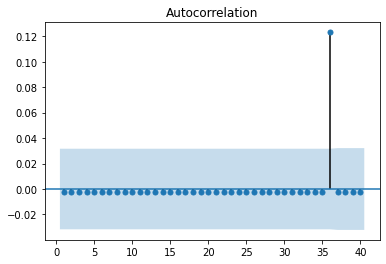

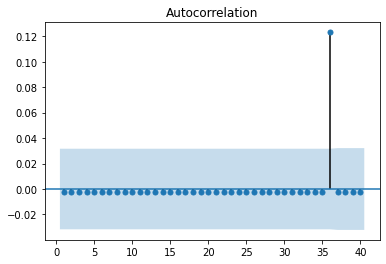

In [88]:
sgt.plot_acf(df.add2, lags = 40, zero=False)

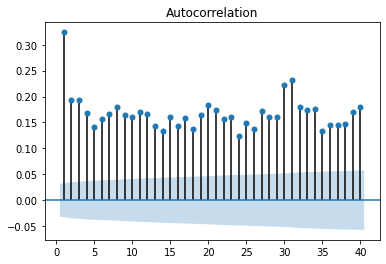

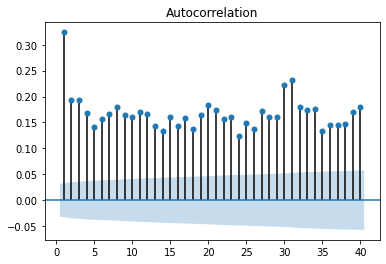

In [89]:
sgt.plot_acf(df.add1, lags = 40, zero=False)

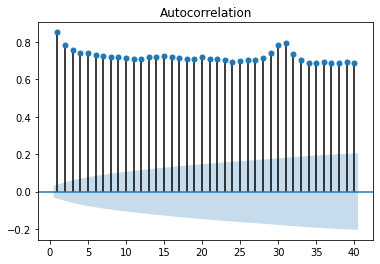

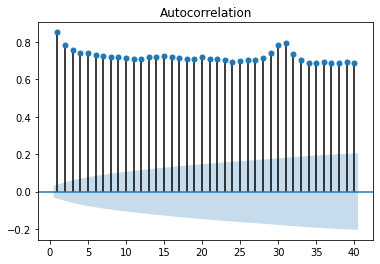

In [90]:
sgt.plot_acf(df.add3, lags = 40, zero=False)

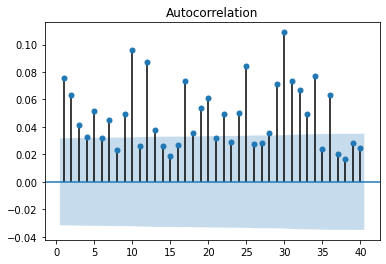

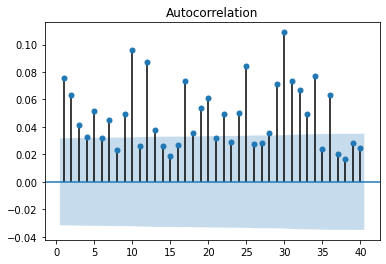

In [91]:
sgt.plot_acf(df.y, lags = 40, zero=False)

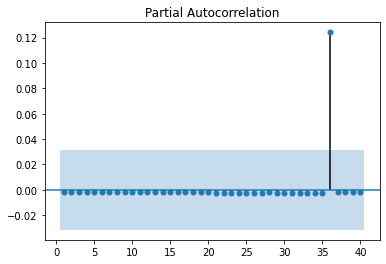

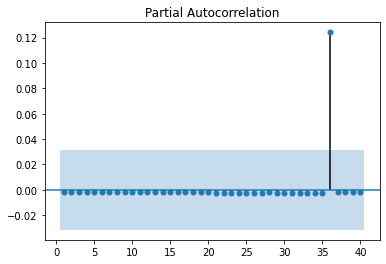

In [92]:
sgt.plot_pacf(df.add2, lags = 40, zero=False)

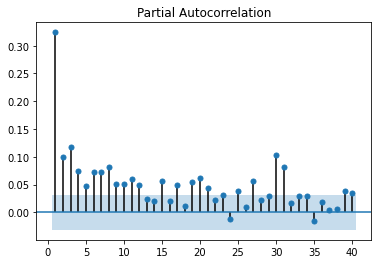

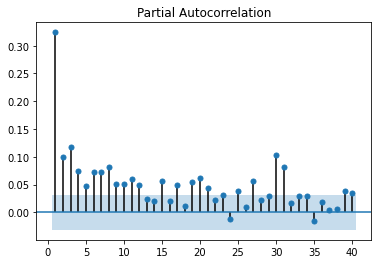

In [93]:
sgt.plot_pacf(df.add1, lags = 40, zero=False)

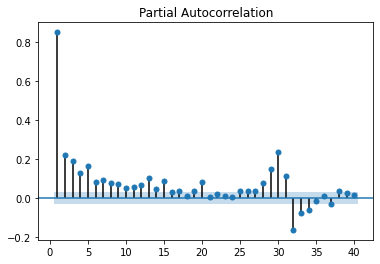

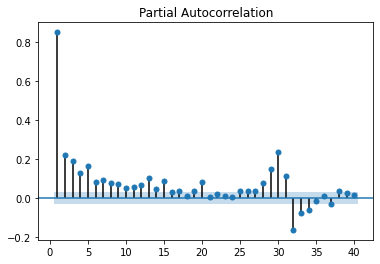

In [94]:
sgt.plot_pacf(df.add3, lags = 40, zero=False)

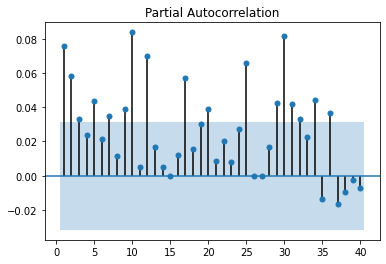

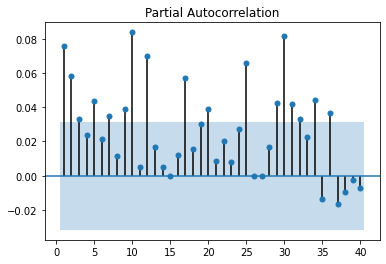

In [95]:
sgt.plot_pacf(df.y, lags = 40, zero=False)

Modelling, AR, MA, ARMA, ARIMA,(I= the diff between observation and the others)

In [96]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [97]:
size = int(len(df)*80)
df_train = df.iloc[:2757]
df_test = df.iloc[2757:]

In [98]:
df_train.tail()

,add2,add1,add3,y
ds,,,,
2018-03-15,25.4,1022.15210,9.1928,134.790
2018-03-16,27.0,840.83180,9.0400,104.845
2018-03-17,30.2,662.77150,8.7100,84.325
2018-03-18,21.2,194.17275,8.4995,97.210
2018-03-19,23.4,688.12410,8.3030,82.960


In [102]:
df_test.head()

,add2,add1,add3,y
ds,,,,
2018-03-20,22.5,853.26175,8.3995,84.845
2018-03-21,23.8,-25.92870,8.4690,55.505
2018-03-22,30.1,601.29820,8.4690,68.740
2018-03-23,33.8,422.39965,8.2769,83.720
2018-03-24,34.7,1073.53695,7.5090,111.765


In [104]:
model_ar = ARMA(df_train.add2, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   add2   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood              -26245.111
Method:                       css-mle   S.D. of innovations           3296.138
Date:                Tue, 11 Oct 2022   AIC                          52496.222
Time:                        00:36:17   BIC                          52513.988
Sample:                             0   HQIC                         52502.640
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.9766     62.711      2.105      0.035       9.065     254.888
ar.L1.add2    -0.0010      0.019     -0.053      0.957      -0.038       0.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -981.6915           +0.0000j          981.6915            0.5000
-----------------------------------------------------------------------------
"""

In [105]:
model_ar = ARMA(df_train.add1, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   add1   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood              -20469.018
Method:                       css-mle   S.D. of innovations            405.624
Date:                Tue, 11 Oct 2022   AIC                          40944.037
Time:                        00:36:44   BIC                          40961.802
Sample:                             0   HQIC                         40950.454
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        992.1018     10.830     91.604      0.000     970.875    1013.329
ar.L1.add1     0.2868      0.018     15.714      0.000       0.251       0.323
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4865           +0.0000j            3.4865            0.0000
-----------------------------------------------------------------------------
"""

In [106]:
model_ar = ARMA(df_train.add3, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   add3   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood               -4976.184
Method:                       css-mle   S.D. of innovations              1.471
Date:                Tue, 11 Oct 2022   AIC                           9958.368
Time:                        00:37:02   BIC                           9976.134
Sample:                             0   HQIC                          9964.786
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2754      0.132     39.957      0.000       5.017       5.534
ar.L1.add3     0.7881      0.012     67.257      0.000       0.765       0.811
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2688           +0.0000j            1.2688            0.0000
-----------------------------------------------------------------------------
"""

In [107]:
model_ar = ARMA(df_train.y, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood              -17369.363
Method:                       css-mle   S.D. of innovations            131.783
Date:                Tue, 11 Oct 2022   AIC                          34744.725
Time:                        00:37:20   BIC                          34762.491
Sample:                             0   HQIC                         34751.143
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.7798      2.663     25.077      0.000      61.560      71.999
ar.L1.y        0.0576      0.019      3.028      0.002       0.020       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           17.3745           +0.0000j           17.3745            0.0000
-----------------------------------------------------------------------------
"""

In [108]:
model_ma = ARMA(df_train.add2, order=(1,0))
results_ma = model_ma.fit()
results_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   add2   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood              -26245.111
Method:                       css-mle   S.D. of innovations           3296.138
Date:                Tue, 11 Oct 2022   AIC                          52496.222
Time:                        00:38:22   BIC                          52513.988
Sample:                             0   HQIC                         52502.640
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.9766     62.711      2.105      0.035       9.065     254.888
ar.L1.add2    -0.0010      0.019     -0.053      0.957      -0.038       0.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -981.6915           +0.0000j          981.6915            0.5000
-----------------------------------------------------------------------------
"""

In [109]:
model_ma = ARMA(df_train.add1, order=(1,0))
results_ma = model_ma.fit()
results_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   add1   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood              -20469.018
Method:                       css-mle   S.D. of innovations            405.624
Date:                Tue, 11 Oct 2022   AIC                          40944.037
Time:                        00:38:52   BIC                          40961.802
Sample:                             0   HQIC                         40950.454
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        992.1018     10.830     91.604      0.000     970.875    1013.329
ar.L1.add1     0.2868      0.018     15.714      0.000       0.251       0.323
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4865           +0.0000j            3.4865            0.0000
-----------------------------------------------------------------------------
"""

In [110]:
model_ma = ARMA(df_train.add3, order=(1,0))
results_ma = model_ma.fit()
results_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   add3   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood               -4976.184
Method:                       css-mle   S.D. of innovations              1.471
Date:                Tue, 11 Oct 2022   AIC                           9958.368
Time:                        00:39:09   BIC                           9976.134
Sample:                             0   HQIC                          9964.786
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2754      0.132     39.957      0.000       5.017       5.534
ar.L1.add3     0.7881      0.012     67.257      0.000       0.765       0.811
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2688           +0.0000j            1.2688            0.0000
-----------------------------------------------------------------------------
"""

In [111]:
model_ma = ARMA(df_train.y, order=(1,0))
results_ma = model_ma.fit()
results_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2757
Model:                     ARMA(1, 0)   Log Likelihood              -17369.363
Method:                       css-mle   S.D. of innovations            131.783
Date:                Tue, 11 Oct 2022   AIC                          34744.725
Time:                        00:39:31   BIC                          34762.491
Sample:                             0   HQIC                         34751.143
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.7798      2.663     25.077      0.000      61.560      71.999
ar.L1.y        0.0576      0.019      3.028      0.002       0.020       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           17.3745           +0.0000j           17.3745            0.0000
-----------------------------------------------------------------------------
"""